<a href="https://colab.research.google.com/github/aak3m1/A3-ICS221/blob/main/A3_ICS221_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import heapq

class Intersection:
    def __init__(self, id):
        self.id = id

class Road:
    def __init__(self, id, name, length, start, end):
        self.id = id
        self.name = name
        self.length = length
        self.start = start
        self.end = end

class TrafficGraph:
    def __init__(self, vertices):
        self.graph = {i: [] for i in range(vertices)}  # adjacency list representation

    def add_road(self, road):
        # Edge from start to end with 'length' as the weight
        self.graph[road.start].append((road.end, road.length))
        # Assuming undirected graph for bidirectional roads
        self.graph[road.end].append((road.start, road.length))

    def dijkstra(self, start_vertex):
        # Minimum distances are initialized to infinity
        distances = {vertex: float('infinity') for vertex in self.graph}
        distances[start_vertex] = 0
        # Priority queue to hold vertices and their current distances
        priority_queue = [(0, start_vertex)]

        while priority_queue:
            current_distance, current_vertex = heapq.heappop(priority_queue)

            # Nodes can only be added once to the queue
            if current_distance > distances[current_vertex]:
                continue

            for neighbor, weight in self.graph[current_vertex]:
                distance = current_distance + weight

                # Only consider this new path if it's better
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(priority_queue, (distance, neighbor))

        return distances

# Example of using the graph
traffic_graph = TrafficGraph(100)  # max 100 vertices
traffic_graph.add_road(Road(1, "Main Street", 5, 0, 1))
traffic_graph.add_road(Road(2, "Second Street", 3, 1, 2))
traffic_graph.add_road(Road(3, "Third Avenue", 7, 0, 2))

# Compute shortest paths from vertex 0
shortest_paths = traffic_graph.dijkstra(0)
print("Shortest paths from intersection 0:", shortest_paths)


Shortest paths from intersection 0: {0: 0, 1: 5, 2: 7, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf, 8: inf, 9: inf, 10: inf, 11: inf, 12: inf, 13: inf, 14: inf, 15: inf, 16: inf, 17: inf, 18: inf, 19: inf, 20: inf, 21: inf, 22: inf, 23: inf, 24: inf, 25: inf, 26: inf, 27: inf, 28: inf, 29: inf, 30: inf, 31: inf, 32: inf, 33: inf, 34: inf, 35: inf, 36: inf, 37: inf, 38: inf, 39: inf, 40: inf, 41: inf, 42: inf, 43: inf, 44: inf, 45: inf, 46: inf, 47: inf, 48: inf, 49: inf, 50: inf, 51: inf, 52: inf, 53: inf, 54: inf, 55: inf, 56: inf, 57: inf, 58: inf, 59: inf, 60: inf, 61: inf, 62: inf, 63: inf, 64: inf, 65: inf, 66: inf, 67: inf, 68: inf, 69: inf, 70: inf, 71: inf, 72: inf, 73: inf, 74: inf, 75: inf, 76: inf, 77: inf, 78: inf, 79: inf, 80: inf, 81: inf, 82: inf, 83: inf, 84: inf, 85: inf, 86: inf, 87: inf, 88: inf, 89: inf, 90: inf, 91: inf, 92: inf, 93: inf, 94: inf, 95: inf, 96: inf, 97: inf, 98: inf, 99: inf}


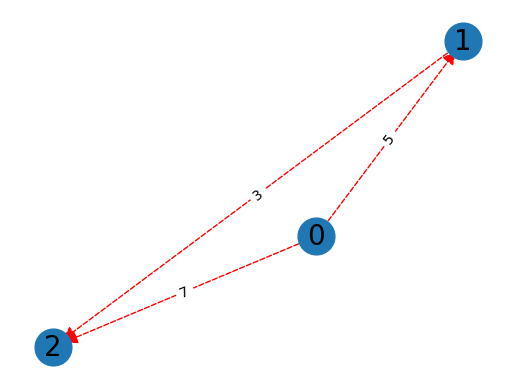

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a new directed graph
G = nx.DiGraph()

# Adding nodes (intersections)
intersections = [0, 1, 2]
for intersection in intersections:
    G.add_node(intersection)

# Adding edges (roads)
roads = [(0, 1, 5), (1, 2, 3), (0, 2, 7)]
for start, end, length in roads:
    G.add_edge(start, end, weight=length)

# Position nodes for visual purposes
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Draw edges with labels
nx.draw_networkx_edges(G, pos, edgelist=roads, arrowstyle='-|>', arrowsize=20, edge_color='r', style='dashed')
labels = {edge: G[edge[0]][edge[1]]['weight'] for edge in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

plt.axis('off')  # Turn off the axis
plt.show()  # Display the plot


